In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
import tqdm.notebook as tqdm

import scipy
import networkx as nx

### Load the Dataset

In [2]:
!ls ../../dataset/

 dataset.csv  'Variable Names (1).xlsx'


In [3]:
df = pd.read_csv("../../dataset/dataset.csv", index_col = [0]).reset_index(drop = True)
df


,ID,CTFLAG,ANYFX,FRAX_SCORE,PARKINS,RHEUMAT,OSTEOPOR,ARTHRIT,CANC_F30,CATARACT,...,F60VITA,TEXPWK,WALKSPD,BKBONE,BKHIP,BKBACK,BKLARM,SMOKING,YEARS_MENOPAUSE,DUR_MENA_MENO
0,131073,1,0,6.14,0.0,0.0,0.0,0.0,0.0,0.0,...,975.84083,2.50000,3.0,1.0,0.0,0.0,1.0,1.0,10.0,-45.0
1,262147,1,0,8.05,0.0,8.0,0.0,1.0,0.0,0.0,...,848.40762,26.83333,3.0,0.0,0.0,0.0,0.0,1.0,13.0,-44.0
2,131075,0,0,12.88,0.0,8.0,0.0,1.0,0.0,1.0,...,629.72861,21.00000,3.0,1.0,0.0,0.0,0.0,1.0,11.0,-45.0
3,262149,0,0,8.78,0.0,8.0,0.0,1.0,0.0,0.0,...,339.14853,32.83333,4.0,0.0,0.0,0.0,0.0,1.0,15.0,-45.0
4,262150,1,1,1.73,0.0,0.0,0.0,0.0,0.0,0.0,...,1574.51101,21.83333,3.0,0.0,0.0,0.0,0.0,0.0,19.0,-30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74199,262130,1,0,3.07,0.0,0.0,0.0,0.0,0.0,0.0,...,668.50414,0.00000,3.0,1.0,0.0,0.0,0.0,0.0,2.0,-46.0
74200,131066,1,0,3.94,0.0,0.0,0.0,0.0,0.0,0.0,...,334.67271,7.50000,3.0,0.0,0.0,0.0,0.0,0.0,7.0,-46.0
74201,262131,0,0,4.45,0.0,0.0,0.0,0.0,0.0,0.0,...,1195.77043,17.08333,3.0,0.0,0.0,0.0,0.0,1.0,1.0,-47.0
74202,131068,1,0,8.54,0.0,0.0,0.0,0.0,0.0,0.0,...,1169.27512,0.00000,9.0,1.0,0.0,0.0,0.0,0.0,13.0,-45.0


In [4]:
#extract cohort, labels, patid
#df = df[df["CTFLAG"] == 0].reset_index(drop=True)

#do not drop frax score yet
labels = df["ANYFX"].reset_index(drop=True)
dataset = df.drop(columns = ["ANYFX", "CTFLAG", "ID"]).reset_index(drop = True)

print("Dataset Shape:", df.shape)

Dataset Shape: (74204, 67)


In [5]:
dataset

,FRAX_SCORE,PARKINS,RHEUMAT,OSTEOPOR,ARTHRIT,CANC_F30,CATARACT,DIARRHEA,ASTHMA,EMPHYSEM,...,F60VITA,TEXPWK,WALKSPD,BKBONE,BKHIP,BKBACK,BKLARM,SMOKING,YEARS_MENOPAUSE,DUR_MENA_MENO
0,6.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,975.84083,2.50000,3.0,1.0,0.0,0.0,1.0,1.0,10.0,-45.0
1,8.05,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,848.40762,26.83333,3.0,0.0,0.0,0.0,0.0,1.0,13.0,-44.0
2,12.88,0.0,8.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,629.72861,21.00000,3.0,1.0,0.0,0.0,0.0,1.0,11.0,-45.0
3,8.78,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,339.14853,32.83333,4.0,0.0,0.0,0.0,0.0,1.0,15.0,-45.0
4,1.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1574.51101,21.83333,3.0,0.0,0.0,0.0,0.0,0.0,19.0,-30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74199,3.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,668.50414,0.00000,3.0,1.0,0.0,0.0,0.0,0.0,2.0,-46.0
74200,3.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,334.67271,7.50000,3.0,0.0,0.0,0.0,0.0,0.0,7.0,-46.0
74201,4.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1195.77043,17.08333,3.0,0.0,0.0,0.0,0.0,1.0,1.0,-47.0
74202,8.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1169.27512,0.00000,9.0,1.0,0.0,0.0,0.0,0.0,13.0,-45.0


### Similarity Network

In [6]:
import torch 
import torch_geometric as pyg

In [7]:
feature_matrix = dataset.drop(columns = ["FRAX_SCORE"]).to_numpy().astype(np.float32)

In [8]:
from sklearn.neighbors import NearestNeighbors
import numpy as np


feature_matrix_np = feature_matrix.astype(np.float32)

k = 800 

# Create the K-NN model
knn = NearestNeighbors(n_neighbors=k, metric='euclidean') 
knn.fit(feature_matrix_np)

# Get the nearest neighbors for each sample
distances, indices = knn.kneighbors(feature_matrix_np)

# Create the edge index and weights
edge_index = torch.tensor([np.repeat(np.arange(feature_matrix_np.shape[0]), k), indices.flatten()])
edge_weight = torch.tensor(distances.flatten())

print(f"Edge Index Shape: {edge_index.shape}")
print(f"Edge Weight Shape: {edge_weight.shape}")

print("\tedges:", edge_index.shape[1])
print("\t(min edge, max edge): (%s, %s)" % (edge_weight.min().numpy(), edge_weight.max().numpy()))
print("\t(avg, std): (%s, %s)" % (edge_weight.mean(), edge_weight.var()))


Edge Index Shape: torch.Size([2, 59363200])
Edge Weight Shape: torch.Size([59363200])
	edges: 59363200
	(min edge, max edge): (0.0, 58230.8515625)
	(avg, std): (tensor(201.3227, dtype=torch.float64), tensor(117758.2277, dtype=torch.float64))


/tmp/ipykernel_520353/2205184920.py:17: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1695392067780/work/torch/csrc/utils/tensor_new.cpp:261.)
  edge_index = torch.tensor([np.repeat(np.arange(feature_matrix_np.shape[0]), k), indices.flatten()])


In [9]:
new_edge_weight = (edge_weight - edge_weight.min()) / (edge_weight.max() - edge_weight.min())
new_edge_index, new_edge_weight = pyg.utils.remove_self_loops(edge_index, new_edge_weight)
print("\t(min edge, max edge): (%s, %s)" % (new_edge_weight.min().numpy(), new_edge_weight.max().numpy()))
print("\t(avg, std): (%s, %s)" % (new_edge_weight.mean(), new_edge_weight.var()))


	(min edge, max edge): (0.0001658795340785393, 1.0)
	(avg, std): (tensor(0.0035, dtype=torch.float64), tensor(3.4757e-05, dtype=torch.float64))


In [10]:
#remove self edges
edge_index, edge_weight = pyg.utils.remove_self_loops(edge_index, edge_weight)

In [11]:
import torch
from torch_geometric.utils import degree

# Compute the top-k edges
threshold = 0.3
topk = int(threshold * len(edge_weight))

topk_indices = torch.topk(edge_weight, topk, largest=True).indices
pruned_edge_index = edge_index[:, topk_indices]
pruned_edge_weight = edge_weight[topk_indices]

# Identify missing nodes
present_nodes = torch.unique(pruned_edge_index)
all_nodes = torch.arange(edge_index.max() + 1)  # Assuming contiguous indices
missing_nodes = all_nodes[~torch.isin(all_nodes, present_nodes)]

print("Missing Nodes:", missing_nodes.shape)
if missing_nodes.numel() > 0:
    # Create a mask for edges containing missing nodes
    mask = torch.isin(edge_index[0], missing_nodes) | torch.isin(edge_index[1], missing_nodes)

    # Extract candidate edges and weights
    candidate_edges = edge_index[:, mask]
    candidate_weights = edge_weight[mask]
    
    print("adding nodes")
    # Find the best edge for each missing node (highest weight)
    node_indices = candidate_edges[0]  # Nodes appearing in candidate edges
    best_edge_indices = torch.argmax(candidate_weights)  # Select strongest connection
    chosen_edges = candidate_edges[:, best_edge_indices].unsqueeze(1)
    chosen_weights = candidate_weights[best_edge_indices].unsqueeze(0)

    # Append selected edges to pruned graph
    pruned_edge_index = torch.cat([pruned_edge_index, chosen_edges], dim=1)
    pruned_edge_weight = torch.cat([pruned_edge_weight, chosen_weights])

# Final pruned graph
edge_index = pruned_edge_index
edge_weight = pruned_edge_weight


Missing Nodes: torch.Size([10478])
adding nodes


Text(0.5, 1.0, 'Distribution of all Edges')

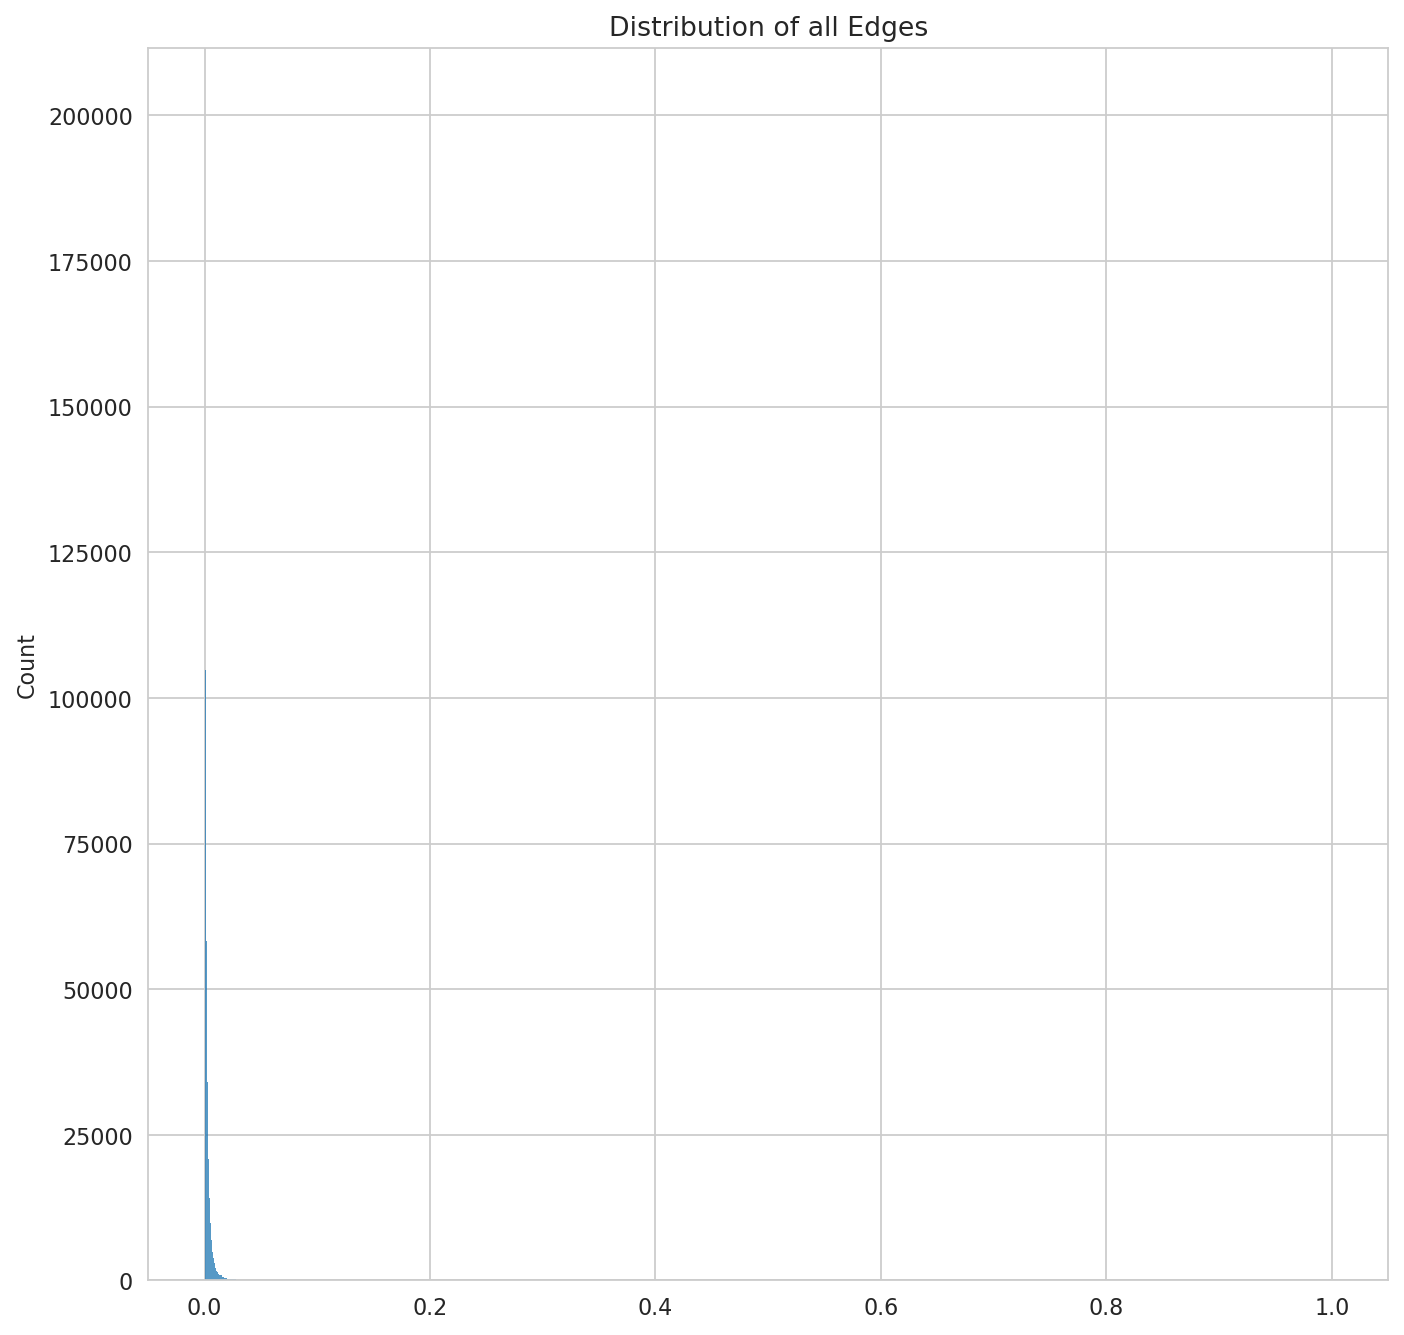

In [12]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 10), dpi=160)
#scale between 0 and 1
edge_weight = (edge_weight - edge_weight.min()) / (edge_weight.max() - edge_weight.min())
sns.histplot(edge_weight)
plt.title("Distribution of all Edges")

In [13]:
edge_weight, edge_index = edge_weight.to(torch.float64), edge_index.to(torch.long)
pyg_g = pyg.data.Data(edge_index = edge_index, edge_weight = edge_weight)

#remove the frax score before putting it in the graph - features are ready to run on 
#standard scaler
from sklearn.preprocessing import StandardScaler as sc
hi = sc()
x = hi.fit_transform(dataset.drop(columns = ["FRAX_SCORE"]).to_numpy())

pyg_g.x = torch.tensor(x, dtype = torch.float32)
pyg_g.num_nodes = dataset.shape[0]
pyg_g.y = torch.tensor(labels.to_numpy(), dtype = torch.float32)

In [14]:
print("Similarity Network Statistics:")
print("\tnodes:", pyg_g.num_nodes)
print("\tedges:", edge_index.shape[1])
print("\t(min edge, max edge): (%s, %s)" % (edge_weight.min().numpy(), edge_weight.max().numpy()))
print("\t(avg, std): (%s, %s)" % (edge_weight.mean(), edge_weight.var()))

Similarity Network Statistics:
	nodes: 74204
	edges: 17786699
	(min edge, max edge): (0.0, 1.0)
	(avg, std): (tensor(0.0029, dtype=torch.float64), tensor(0.0001, dtype=torch.float64))


In [15]:
dataset.drop(columns = ["FRAX_SCORE"]).to_numpy().shape

(74204, 63)

### Plotting Graph

take 50 nodes that are class 0 that are connected to 50 nodes in class 1

In [ ]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
import matplotlib.patches as mpatches

data = pyg_g
num_nodes = 1000  # Number of nodes per class to select

# Extract class labels
class_0_mask = (data.y == 0)
class_1_mask = (data.y == 1)

# Get node indices for each class
class_0_nodes = torch.where(class_0_mask)[0].tolist()
class_1_nodes = torch.where(class_1_mask)[0].tolist()

# Convert edge_index to NumPy for faster filtering
edges_np = data.edge_index.numpy().T  # Shape: (num_edges, 2)

# Convert class indices to sets for fast lookup
class_0_set = set(class_0_nodes)
class_1_set = set(class_1_nodes)

print("Step 1: Find intra-class edges (same class connections)")
intra_class_edges_0 = {src for src, tgt in edges_np if src in class_0_set and tgt in class_0_set}
intra_class_edges_1 = {src for src, tgt in edges_np if src in class_1_set and tgt in class_1_set}

print("Step 2: Find inter-class edges (cross-class connections)")
inter_class_edges_0 = {src for src, tgt in edges_np if src in class_0_set and tgt in class_1_set}
inter_class_edges_1 = {src for src, tgt in edges_np if src in class_1_set and tgt in class_0_set}

print("Step 3: Select nodes that satisfy both intra- and inter-class connectivity")
valid_class_0 = list(intra_class_edges_0 & inter_class_edges_0)[:num_nodes]
valid_class_1 = list(intra_class_edges_1 & inter_class_edges_1)[:num_nodes]

# Convert selected nodes to sets
selected_class_0 = set(valid_class_0)
selected_class_1 = set(valid_class_1)

print("Step 4: Filter edges to include only selected nodes")
# Convert selected nodes into a single NumPy array for fast vectorized operations
selected_nodes = np.array(list(selected_class_0 | selected_class_1))

# Use NumPy's `isin` for fast membership checking
mask_src = np.isin(edges_np[:, 0], selected_nodes)  # Check if src is in selected nodes
mask_tgt = np.isin(edges_np[:, 1], selected_nodes)  # Check if tgt is in selected nodes

# Keep only edges where both src and tgt are in the selected nodes
filtered_edges = edges_np[mask_src & mask_tgt]  # Faster filtering

# Convert back to list (if needed for NetworkX)
selected_edges = filtered_edges.tolist()

print("plotting")
# Create NetworkX graph
G = nx.Graph()
G.add_edges_from(selected_edges)

# Compute positions for visualization
pos = nx.spring_layout(G, seed=42) 


# Define colors
color_class_0 = "lightblue"
color_class_1 = "salmon"

# Assign node colors based on class
node_colors = [color_class_0 if node in selected_class_0 else color_class_1 for node in G.nodes]

# Draw nodes and edges
plt.figure(figsize=(8, 8), dpi=160)
nx.draw_networkx_nodes(G, pos, node_size=10, node_color=node_colors)
nx.draw_networkx_edges(G, pos, alpha=0.01)

# Create legend handles
legend_patches = [
    mpatches.Patch(color=color_class_0, label="Class 0"),
    mpatches.Patch(color=color_class_1, label="Class 1")
]

# Add legend
plt.legend(handles=legend_patches, loc="upper right", fontsize=5)
plt.title("Graph Clusters: Nodes Connected to Own and Other Class")
plt.show()


### Training Loop

In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve

def FRAX_maximize_youden_j(y_true: pd.Series, y_prob: pd.Series) -> float:
    """
    Finds the optimal threshold that maximizes Youden’s J Statistic (TPR - FPR).

    :param y_true: Pandas Series of true binary labels (0 or 1).
    :param y_prob: Pandas Series of predicted probabilities.
    :return: The optimal threshold for classification.
    """
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    
    # Compute Youden’s J statistic
    j_scores = tpr - fpr

    # Find the optimal threshold (maximum J score)
    best_threshold = thresholds[np.argmax(j_scores)]

    print(f"Optimal Threshold (Max Youden's J): {best_threshold:.4f}")

    return best_threshold



In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample

import pandas as pd
import numpy as np

def weighted_downsample(X: pd.DataFrame, 
                        y: pd.Series, 
                        feature_list: list = ["ETHNICNIH", "RACENIH"],
                        weights_dict: dict = None, 
                        frac: float = 0.5, 
                        random_state: int = 42):

    valid_features = [f for f in feature_list if f in X.columns]
    if not valid_features:
        raise ValueError("None of the specified features exist in X.")

    #no weights_dict is provided
    if weights_dict is None:
        weights_dict = {feature: 1 / len(valid_features) for feature in valid_features}

    total_weight = sum(weights_dict.values())
    normalized_weights = {k: v / total_weight for k, v in weights_dict.items() if k in valid_features}
    sampling_weights = X[valid_features].mul(normalized_weights).sum(axis=1)
    sampling_weights = np.maximum(sampling_weights, 1e-10)  # Avoid zero probability
    sampling_weights /= sampling_weights.sum()
    downsampled_indices = (
        pd.concat([X, y], axis=1) 
        .groupby(y.name, group_keys=False)  
        .apply(lambda group: group.sample(frac=frac, weights=sampling_weights.loc[group.index], random_state=random_state))
        .index
    )

    X_downsampled = X.loc[downsampled_indices]
    y_downsampled = y.loc[downsampled_indices]

    return X_downsampled, y_downsampled


def weighted_downsample_LABELS(df, labels, target_ratio=0.5, random_state=42):
    """
    Performs weighted downsampling to balance classes in the dataset.

    :param df: DataFrame with features.
    :param labels: Series with target labels.
    :param target_ratio: Desired ratio of the minority class.
    :param random_state: Random seed for reproducibility.
    :return: Downsampled features (X) and labels (y).
    """
    # Combine features and labels into one DataFrame
    df['label'] = labels
    
    # Identify majority and minority classes
    class_counts = df['label'].value_counts()
    min_class = class_counts.idxmin()
    maj_class = class_counts.idxmax()

    # Compute the target number of samples for the majority class
    n_min = class_counts[min_class]
    n_maj = int(n_min / target_ratio - n_min)

    # Get indices of the minority and majority class
    minority_indices = df[df['label'] == min_class].index
    majority_indices = df[df['label'] == maj_class].index

    # Downsample the majority class while keeping track of indices
    df_majority_downsampled = resample(df.loc[majority_indices], 
                                       replace=False, 
                                       n_samples=n_maj, 
                                       random_state=random_state)

    # Combine the balanced dataset
    df_balanced = pd.concat([df.loc[minority_indices], df_majority_downsampled])

    # Separate features, labels, and indices
    y_balanced = df_balanced['label']
    X_balanced = df_balanced.drop(columns=['label'])
    selected_indices = df_balanced.index.to_list()  # Convert indices to a list

    return X_balanced, y_balanced, selected_indices




In [18]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

def evaluate_model(y_true, y_pred, y_prob=None, descr = None):
    """
    Computes and prints standard classification metrics: Accuracy, AUC, Precision, Recall, and F1-score.

    :param y_true: List or array of true labels (0 or 1).
    :param y_pred: List or array of predicted labels (0 or 1).
    :param y_prob: List or array of predicted probabilities (optional, needed for AUC).
    :return: Dictionary containing Accuracy, AUC, Precision, Recall, and F1-score.
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)


    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_prob), 
        "F1-score": f1_score(y_true, y_pred, zero_division=0),
        "Sesitivity": recall_score(y_true, y_pred, zero_division=0),
        "Specificity": specificity 
    }

    # Print metrics
    if descr:
        print(descr)
    for key, value in metrics.items():
        print(f"\t{key}: {value:.4f}" if value is not None else f"{key}: N/A (Only one class present)")

    return metrics

    
    #extract featuresd
    y_pred = model.predict(X_train_balanced)
    y_prob = model.predict_proba(X_train_balanced)[:, 1]

def eval_run(model, x, y, descr = None):
    y_pred = model.predict(x)
    y_prob = model.predict_proba(x)[:, 1]
    evaluate_model(y, y_pred, y_prob, descr = descr)

def eval_frax(frax_scores, labels, descr = None, threshold = None):
    if threshold:
        pass
    else:
        threshold = FRAX_maximize_youden_j(labels, frax_scores)
    y_pred = (frax_scores >= threshold).astype(int)
    metrics = evaluate_model(labels, y_pred, frax_scores, descr = descr)
    return threshold, metrics



In [19]:
random_cv_avail = True

import scipy

param_dist = {
    'n_estimators': scipy.stats.randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': scipy.stats.randint(2, 20),
    'min_samples_leaf': scipy.stats.randint(1, 10),
    'max_features': ['sqrt', 'log2']
}

In [20]:
edge_index[0].max()

tensor(74203)

In [21]:
dataset.to_numpy().shape

(74204, 64)

### Defining the Model

In [22]:
!nvidia-smi

Thu Mar 13 01:30:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.144.03             Driver Version: 550.144.03     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A40                     On  |   00000000:46:00.0 Off |                    0 |
|  0%   30C    P8             28W /  300W |       4MiB /  46068MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [23]:
import torch
import torch.nn as nn

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0, reduction="mean"):
        """
        Implements Focal Loss for binary classification.
        Args:
            alpha (float): Balancing factor for class weights.
            gamma (float): Focusing parameter for hard examples.
            reduction (str): 'mean' (default) or 'sum'.
        """
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        self.bce_loss = nn.BCEWithLogitsLoss(reduction="none")  # Keep raw loss for focal scaling

    def forward(self, logits, targets):
        """
        Args:
            logits: Raw model outputs (before sigmoid).
            targets: Ground truth labels (binary, 0 or 1).
        Returns:
            Focal Loss value.
        """
        bce_loss = self.bce_loss(logits, targets)  # Compute standard BCE loss
        probs = torch.sigmoid(logits)  # Convert logits to probabilities
        targets = targets.float()

        # Compute focal loss scaling factor
        p_t = targets * probs + (1 - targets) * (1 - probs)
        focal_factor = (1 - p_t) ** self.gamma

        # Apply alpha weighting (for class balance)
        alpha_factor = targets * self.alpha + (1 - targets) * (1 - self.alpha)

        # Compute final focal loss
        loss = alpha_factor * focal_factor * bce_loss

        if self.reduction == "mean":
            return loss.mean()
        elif self.reduction == "sum":
            return loss.sum()
        else:
            return loss  # No reduction (per-sample loss)

In [24]:
import torch
import torch_geometric as pyg

print(torch.cuda.is_available())
print([torch.cuda.device(i) for i in range(torch.cuda.device_count())])

True


In [25]:
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.nn import GATConv

class GAT(torch.nn.Module):
    def __init__(self, num_layers, num_heads, node_features=63, hidden_channels=50, out_channels=1):
        super(GAT, self).__init__()

        self.num_layers = num_layers  
        self.module_list = torch.nn.ModuleList()

        # Input layer
        self.in_layer = GATConv(in_channels=node_features, 
                                out_channels=hidden_channels, 
                                heads=num_heads, 
                                concat=True)

        # Hidden layers
        for _ in range(num_layers):
            self.module_list.append(GATConv(in_channels=hidden_channels * num_heads, 
                                            out_channels=hidden_channels, 
                                            heads=num_heads, 
                                            concat=True))


        self.out_layer = Linear(hidden_channels * num_heads, out_channels)

    def forward(self, x, edge_index, edge_weight):
    
        x = self.in_layer(x, edge_index, edge_attr = edge_weight)
        x = F.relu(x)  

        for layer in self.module_list:
            x = layer(x, edge_index, edge_attr = edge_weight)
        

        x = self.out_layer(x)
        return x
    

import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, num_layers, node_features=63, hidden_channels=50, out_channels=1):
        super(GCN, self).__init__()

        self.num_layers = num_layers  
        self.module_list = torch.nn.ModuleList()

        # Input layer
        self.in_layer = GCNConv(in_channels=node_features, out_channels=hidden_channels)

        # Hidden layers
        for _ in range(num_layers):
            self.module_list.append(GCNConv(in_channels=hidden_channels, out_channels=hidden_channels))

        # Output layer
        self.out_layer = Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index, edge_weight=None):
        x = self.in_layer(x, edge_index, edge_weight)
        x = F.relu(x)  

        for layer in self.module_list:
            x = layer(x, edge_index, edge_weight)
            x = F.relu(x)  # Apply ReLU activation after each layer
        
        x = self.out_layer(x)
        return x

    
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.nn import SAGEConv

class GraphSAGE(torch.nn.Module):
    def __init__(self, num_layers, node_features=63, hidden_channels=50, out_channels=1, aggr="mean"):
        super(GraphSAGE, self).__init__()

        self.num_layers = num_layers  
        self.module_list = torch.nn.ModuleList()

        # Input layer
        self.in_layer = SAGEConv(in_channels=node_features, out_channels=hidden_channels, aggr=aggr)

        # Hidden layers
        for _ in range(num_layers):
            self.module_list.append(SAGEConv(in_channels=hidden_channels, out_channels=hidden_channels, aggr=aggr))

        # Output layer
        self.out_layer = Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index, edge_weight=None):
        x = self.in_layer(x, edge_index)
        x = F.relu(x)  

        for layer in self.module_list:
            x = layer(x, edge_index)
            x = F.relu(x)  # Apply ReLU activation after each layer
        
        x = self.out_layer(x)
        return x






In [26]:
import torch.optim as optim

device = torch.device("cuda:0")

pyg_g.edge_index = pyg_g.edge_index.to(device)
pyg_g.edge_weight = pyg_g.edge_weight.to(device)
pyg_g.x = pyg_g.x.to(torch.float64).to(device)
pyg_g.y = pyg_g.y.to(torch.float64).to(device)

In [27]:
print(f"x dtype: {pyg_g.x.dtype}, shape: {pyg_g.x.shape}, device: {pyg_g.x.device}")
print(f"edge_index dtype: {pyg_g.edge_index.dtype}, shape: {pyg_g.edge_index.shape}, device: {pyg_g.edge_index.device}")
if edge_weight is not None:
    print(f"edge_weight dtype: {pyg_g.edge_weight.dtype}, shape: {pyg_g.edge_weight.shape}, device: {pyg_g.edge_weight.device}")
else:
    print("edge_weight is None")


x dtype: torch.float64, shape: torch.Size([74204, 63]), device: cuda:0
edge_index dtype: torch.int64, shape: torch.Size([2, 17786699]), device: cuda:0
edge_weight dtype: torch.float64, shape: torch.Size([17786699]), device: cuda:0


In [28]:
pyg_g

Data(edge_index=[2, 17786699], edge_weight=[17786699], x=[74204, 63], num_nodes=74204, y=[74204])

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from torch_geometric.loader import NeighborLoader
from tqdm.notebook import tqdm

n_bootstraps = 10
lr = 0.01  # learning rate
epoch_num = 50

# List to store metrics from each bootstrap iteration
bootstrap_metrics = []
frax_metrics = []

for bootstrap in range(n_bootstraps):
    print(f"---------------------------------Bootstrap {bootstrap+1}/{n_bootstraps}---------------------------------")
    
    # Create bootstrap sample indices (with replacement) from the entire dataset
    all_indices = np.arange(len(dataset))
    train_idx = np.random.choice(all_indices, size=len(dataset), replace=True)
    unique_train_idx = np.unique(train_idx)  # unique indices in bootstrap sample
    test_idx = np.setdiff1d(all_indices, unique_train_idx)  # out-of-bag indices
    
    if len(test_idx) == 0:
        print("No out-of-bag samples for this bootstrap. Skipping iteration.")
        continue
    
    # Split train and test sets based on bootstrap indices
    X_train, X_test = dataset.iloc[train_idx], dataset.iloc[test_idx]
    y_train, y_test = labels.iloc[train_idx], labels.iloc[test_idx]
    
    print("[TRAIN] Bootstrap Label Distr:", dict(pd.Series(y_train).value_counts()))
    
    # Retrieve FRAX_SCORE values and then drop the column for further processing
    frax_score_train, frax_score_test = X_train["FRAX_SCORE"], X_test["FRAX_SCORE"]
   
    # Evaluate FRAX threshold on training data
    FRAX_threshold, _ = eval_frax(frax_score_train, y_train, descr="FRAX Train:")
    
    
    # Initialize the model (e.g., a 4-layer GAT with 2 attention heads each)
    model = GAT(num_layers = 4, num_heads=2).double().to(device)
    #model = GraphSAGE(num_layers = 4).double().to(device)
    criterion = FocalLoss().to(device)
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)
    
    
    train_mask = torch.zeros(pyg_g.num_nodes, dtype=torch.bool).to(device)
    train_mask[train_idx] = True
    train_g = pyg_g.subgraph(train_mask).to(device)
    
    batch_size = 128  
    num_neighbors = [10, 5]  
    train_loader = NeighborLoader(
        train_g,
        num_neighbors = num_neighbors,
        batch_size = batch_size,
        shuffle = False
    )
    
    # Training loop
    with tqdm(range(epoch_num), desc=f"TRAIN GNN (Bootstrap {bootstrap+1})") as pbar:
        train_probs = []
        train_y = []
        for epoch in pbar:
            model.train()
            total_loss = 0
            for batch in train_loader:
                optimizer.zero_grad()
                batch = batch.to(device)
                out = model(batch.x, batch.edge_index, batch.edge_weight)
                loss = criterion(out.squeeze(), batch.y)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
                
                if epoch == epoch_num - 1:
                    train_probs.append(torch.sigmoid(out).squeeze().detach().cpu())
                    train_y.append(batch.y.cpu())
                    
            scheduler.step()
            pbar.set_postfix({"Loss": f"{total_loss / len(train_loader):.4f}"})
    
    train_probs = torch.cat(train_probs, dim=0)
    train_y = torch.cat(train_y, dim=0)
    train_preds = (train_probs > 0.23)
    # Optionally evaluate training performance
    evaluate_model(train_y, train_preds, train_probs, descr="GNN Train:")
    
    ###########################################################################
    # Out-of-bag evaluation (using nodes not in the bootstrap training set)
    
    
    print("[TEST] Label Distr:", dict(pd.Series(y_test).value_counts()))
    _, frax_evals = eval_frax(frax_score_test, y_test, descr="FRAX Test:", threshold=FRAX_threshold)
    
    model.eval()
    test_probs = []
    test_y = []
    test_loader = NeighborLoader(
        pyg_g,
        input_nodes= test_idx,
        num_neighbors= num_neighbors,
        batch_size = batch_size,
        shuffle = False
    )
    
    for batch in test_loader:
        batch = batch.to(device)
        out = model(batch.x, batch.edge_index, batch.edge_weight)
        test_probs.append(torch.sigmoid(out).squeeze().detach().cpu())
        test_y.append(batch.y.cpu())
    
    test_probs = torch.cat(test_probs, dim=0)
    test_y = torch.cat(test_y, dim=0)
    test_preds = (test_probs > 0.22)
    

    # Also call your evaluation function if needed:
    metrics = evaluate_model(test_y, test_preds, test_probs, descr="GNN Test:")
    # Compute evaluation metrics on the test set
    bootstrap_metrics.append(metrics)
    frax_metrics.append(frax_evals)
    print("\n")




---------------------------------Bootstrap 1/10---------------------------------
[TRAIN] Bootstrap Label Distr: {0: 69959, 1: 4245}
Optimal Threshold (Max Youden's J): 5.9700
FRAX Train:
	Accuracy: 0.4733
	AUC: 0.5665
	F1-score: 0.1198
	Sesitivity: 0.6264
	Specificity: 0.4640


TRAIN GNN (Bootstrap 1):   0%|          | 0/50 [00:00<?, ?it/s]

GNN Train:
	Accuracy: 0.9743
	AUC: 0.9765
	F1-score: 0.7787
	Sesitivity: 0.7939
	Specificity: 0.9852
[TEST] Label Distr: {0: 25560, 1: 1621}
FRAX Test:
	Accuracy: 0.4738
	AUC: 0.5642
	F1-score: 0.1227
	Sesitivity: 0.6169
	Specificity: 0.4647
GNN Test:
	Accuracy: 0.9268
	AUC: 0.8176
	F1-score: 0.4735
	Sesitivity: 0.5599
	Specificity: 0.9497


---------------------------------Bootstrap 2/10---------------------------------
[TRAIN] Bootstrap Label Distr: {0: 69890, 1: 4314}
Optimal Threshold (Max Youden's J): 5.6300
FRAX Train:
	Accuracy: 0.4257
	AUC: 0.5607
	F1-score: 0.1198
	Sesitivity: 0.6720
	Specificity: 0.4105


TRAIN GNN (Bootstrap 2):   0%|          | 0/50 [00:00<?, ?it/s]

GNN Train:
	Accuracy: 0.9395
	AUC: 0.5509
	F1-score: 0.0163
	Sesitivity: 0.0086
	Specificity: 0.9970
[TEST] Label Distr: {0: 25697, 1: 1610}
FRAX Test:
	Accuracy: 0.4313
	AUC: 0.5688
	F1-score: 0.1215
	Sesitivity: 0.6671
	Specificity: 0.4165
GNN Test:
	Accuracy: 0.9355
	AUC: 0.5374
	F1-score: 0.0196
	Sesitivity: 0.0110
	Specificity: 0.9928


---------------------------------Bootstrap 3/10---------------------------------
[TRAIN] Bootstrap Label Distr: {0: 69882, 1: 4322}
Optimal Threshold (Max Youden's J): 5.9100
FRAX Train:
	Accuracy: 0.4659
	AUC: 0.5671
	F1-score: 0.1225
	Sesitivity: 0.6402
	Specificity: 0.4551


TRAIN GNN (Bootstrap 3):   0%|          | 0/50 [00:00<?, ?it/s]

GNN Train:
	Accuracy: 0.9392
	AUC: 0.8857
	F1-score: 0.4651
	Sesitivity: 0.4534
	Specificity: 0.9693
[TEST] Label Distr: {0: 25725, 1: 1603}
FRAX Test:
	Accuracy: 0.4683
	AUC: 0.5655
	F1-score: 0.1202
	Sesitivity: 0.6195
	Specificity: 0.4589
GNN Test:
	Accuracy: 0.7774
	AUC: 0.7658
	F1-score: 0.2449
	Sesitivity: 0.6173
	Specificity: 0.7873


---------------------------------Bootstrap 4/10---------------------------------
[TRAIN] Bootstrap Label Distr: {0: 69804, 1: 4400}
Optimal Threshold (Max Youden's J): 6.0700
FRAX Train:
	Accuracy: 0.4839
	AUC: 0.5693
	F1-score: 0.1259
	Sesitivity: 0.6268
	Specificity: 0.4749


TRAIN GNN (Bootstrap 4):   0%|          | 0/50 [00:00<?, ?it/s]

GNN Train:
	Accuracy: 0.9308
	AUC: 0.7087
	F1-score: 0.1139
	Sesitivity: 0.0750
	Specificity: 0.9848
[TEST] Label Distr: {0: 25744, 1: 1587}
FRAX Test:
	Accuracy: 0.4849
	AUC: 0.5598
	F1-score: 0.1171
	Sesitivity: 0.5885
	Specificity: 0.4785
GNN Test:
	Accuracy: 0.9133
	AUC: 0.6391
	F1-score: 0.0913
	Sesitivity: 0.0743
	Specificity: 0.9655


---------------------------------Bootstrap 5/10---------------------------------
[TRAIN] Bootstrap Label Distr: {0: 69909, 1: 4295}
Optimal Threshold (Max Youden's J): 7.4700
FRAX Train:
	Accuracy: 0.6530
	AUC: 0.5717
	F1-score: 0.1273
	Sesitivity: 0.4373
	Specificity: 0.6663


TRAIN GNN (Bootstrap 5):   0%|          | 0/50 [00:00<?, ?it/s]

GNN Train:
	Accuracy: 0.9737
	AUC: 0.9753
	F1-score: 0.7811
	Sesitivity: 0.7899
	Specificity: 0.9853
[TEST] Label Distr: {0: 25629, 1: 1551}
FRAX Test:
	Accuracy: 0.6485
	AUC: 0.5614
	F1-score: 0.1193
	Sesitivity: 0.4172
	Specificity: 0.6625
GNN Test:
	Accuracy: 0.9291
	AUC: 0.8271
	F1-score: 0.4865
	Sesitivity: 0.5727
	Specificity: 0.9513


---------------------------------Bootstrap 6/10---------------------------------
[TRAIN] Bootstrap Label Distr: {0: 69911, 1: 4293}
Optimal Threshold (Max Youden's J): 6.9700
FRAX Train:
	Accuracy: 0.5980
	AUC: 0.5593
	F1-score: 0.1209
	Sesitivity: 0.4780
	Specificity: 0.6054


TRAIN GNN (Bootstrap 6):   0%|          | 0/50 [00:00<?, ?it/s]

In [32]:
# Calculate average metrics and 95% confidence intervals (CI)
if bootstrap_metrics:
    # Convert list of dicts to dict of lists
    aggregated_metrics = {key: [m[key] for m in bootstrap_metrics] for key in bootstrap_metrics[0].keys()}
    print("Average Metrics and 95% Confidence Intervals:")
    for key, values in aggregated_metrics.items():
        mean_val = np.mean(values)
        ci_lower = np.percentile(values, 2.5)
        ci_upper = np.percentile(values, 97.5)
        print(f"{key.capitalize()}: Mean = {mean_val:.4f} [{ci_lower:.4f}, {ci_upper:.4f}]")

Average Metrics and 95% Confidence Intervals:
Accuracy: Mean = 0.9617 [0.9602, 0.9635]
Auc: Mean = 0.8269 [0.8180, 0.8349]
F1-score: Mean = 0.6618 [0.6551, 0.6727]
Sesitivity: Mean = 0.6430 [0.6256, 0.6631]
Specificity: Mean = 0.9814 [0.9789, 0.9842]


In [31]:
# Calculate average metrics and 95% confidence intervals (CI)
if frax_metrics:
    # Convert list of dicts to dict of lists
    aggregated_metrics = {key: [m[key] for m in frax_metrics] for key in frax_metrics[0].keys()}
    print("Average Metrics and 95% Confidence Intervals:")
    for key, values in aggregated_metrics.items():
        mean_val = np.mean(values)
        ci_lower = np.percentile(values, 2.5)
        ci_upper = np.percentile(values, 97.5)
        print(f"{key.capitalize()}: Mean = {mean_val:.4f}, 95% CI = [{ci_lower:.4f}, {ci_upper:.4f}]")

Average Metrics and 95% Confidence Intervals:
Accuracy: Mean = 0.5128, 95% CI = [0.3420, 0.6719]
Auc: Mean = 0.5663, 95% CI = [0.5624, 0.5727]
F1-score: Mean = 0.1209, 95% CI = [0.1175, 0.1231]
Sesitivity: Mean = 0.5711, 95% CI = [0.3843, 0.7661]
Specificity: Mean = 0.5092, 95% CI = [0.3153, 0.6899]


## Get Probs for Entire Dataset to calculate AUC/PRC curves

In [150]:
model = model_list[-1]

NameError: name 'model_list' is not defined

In [ ]:
all_loader = NeighborLoader(
    pyg_g,
    num_neighbors = num_neighbors,
    batch_size = batch_size,
    shuffle = False)

In [ ]:
all_probs = []
all_y = []
for batch in all_loader:  # Iterate over mini-batches
    batch = batch.to(device)
    out = model(batch.x, batch.edge_index, batch.edge_weight)
    all_probs.append(torch.sigmoid(out).squeeze().detach().cpu())
    all_y.append(batch.y.cpu())

all_probs = torch.cat(all_probs, dim = 0)
all_y = torch.cat(all_y, dim = 0)
all_preds = (all_probs > 0.25)
evaluate_model(all_y, all_preds, all_probs, descr = "GNN all:")
print("\n")

In [ ]:
!ls ..

In [ ]:
#save
parent_dir = "../probs_cohortall"

np.save(parent_dir + "/KNN_GAT.npy", all_probs)
np.save(parent_dir + "/Y_KNN_GAT.npy", all_y)


In [ ]:
#frax
frax_score = dataset["FRAX_SCORE"]
frax_df = dataset.drop(columns = ["FRAX_SCORE"])
FRAX_threshold = eval_frax(frax_score, labels, descr = "FRAX Train:")

In [ ]:
np.save(parent_dir + "/frax_all.npy", frax_score.to_numpy())
np.save(parent_dir + "/frax_Y.npy", labels.to_numpy())

## Plot Lines

In [ ]:
test_y, test_probs = test_y.numpy(), test_probs.numpy()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(test_y, test_probs)

# Set plot style
sns.set_style('whitegrid')

plt.figure(figsize=(10, 10), dpi=160)

# Sample fewer thresholds for faster computation
num_points = 50  # Reduce number of threshold calculations
threshold_idxs = np.linspace(0, len(thresholds) - 1, num_points, dtype=int)
sampled_thresholds = thresholds[threshold_idxs]

# Plot Precision and Recall vs. Threshold
plt.plot(sampled_thresholds, precision[threshold_idxs], label="Precision", linestyle='--', marker='o', markersize=3, color='red')
plt.plot(sampled_thresholds, recall[threshold_idxs], label="Recall", linestyle='-', marker='s', markersize=3, color='blue')

# Annotate selected threshold values
for i in range(0, len(sampled_thresholds), max(1, len(sampled_thresholds) // 10)):  # Avoid division by zero
    plt.annotate(f"{sampled_thresholds[i]:.2f}", 
                 (sampled_thresholds[i], precision[threshold_idxs[i]]), 
                 textcoords="offset points", 
                 xytext=(-5,5), 
                 ha='right', fontsize=9, color='red')
    
    plt.annotate(f"{sampled_thresholds[i]:.2f}", 
                 (sampled_thresholds[i], recall[threshold_idxs[i]]), 
                 textcoords="offset points", 
                 xytext=(-5,-10), 
                 ha='right', fontsize=9, color='blue')

# Labels and title
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Threshold")
plt.legend()

# Show plot
plt.show()


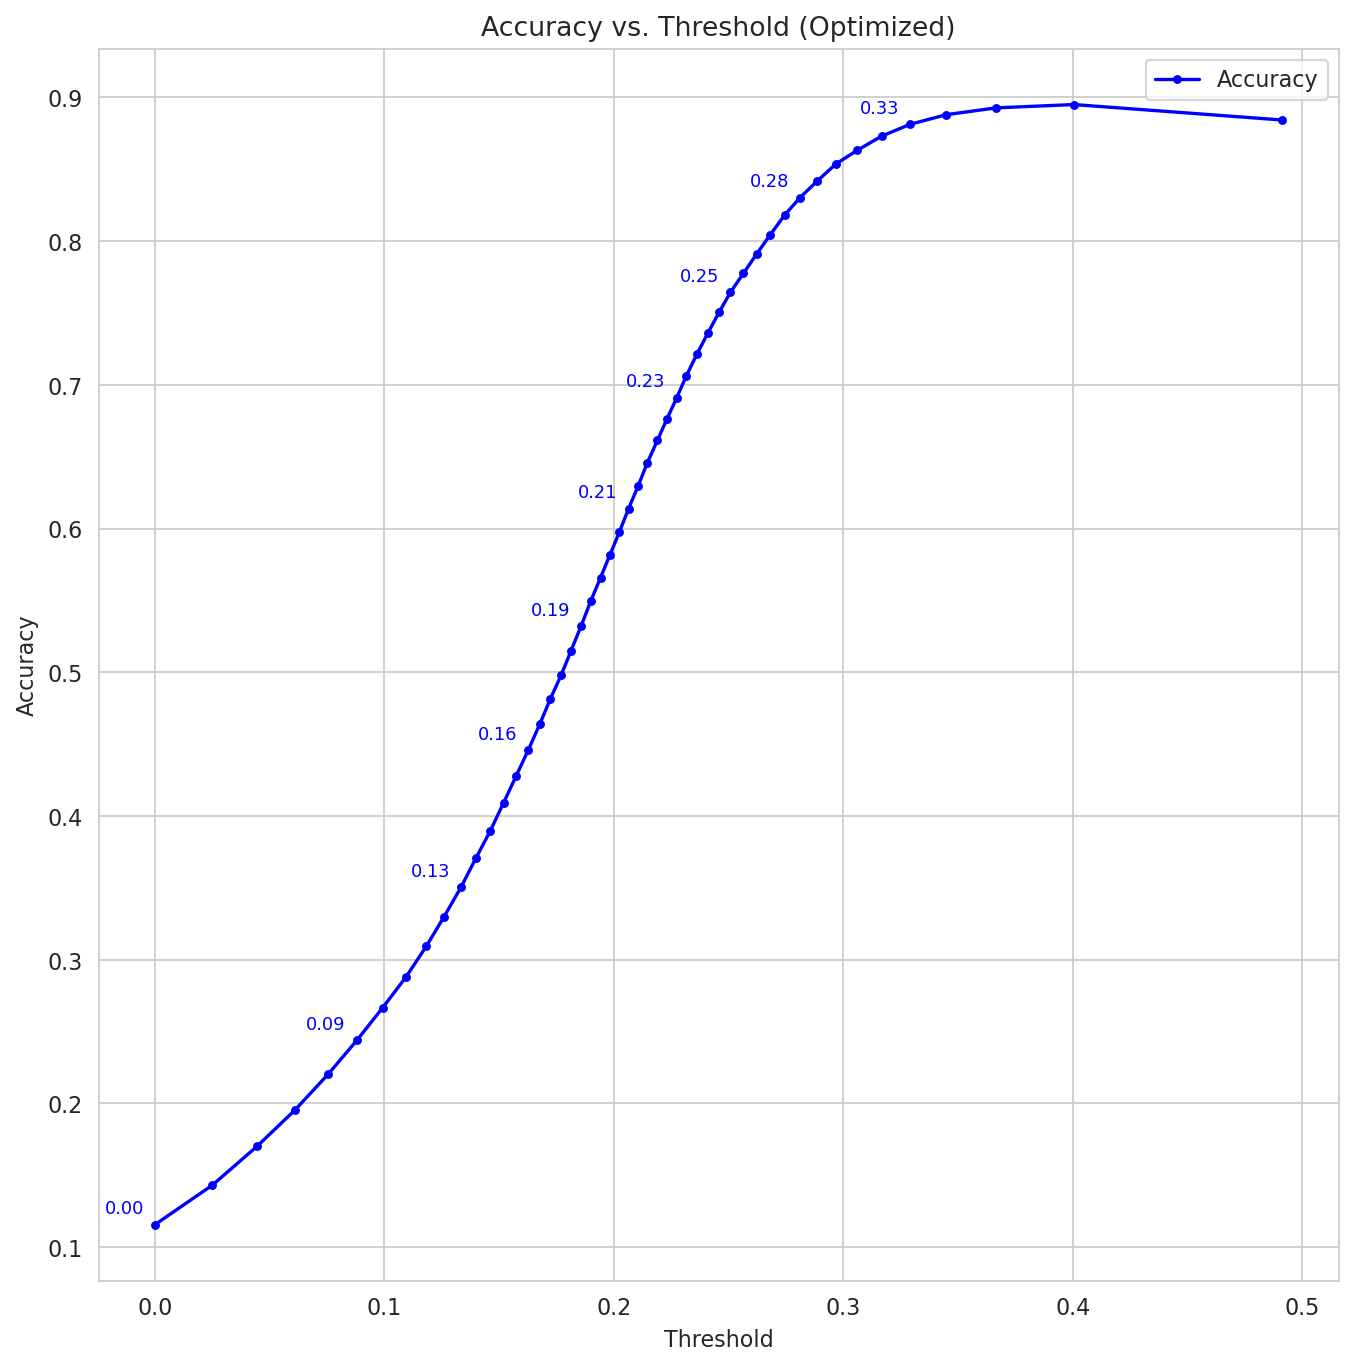

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_curve

# Compute precision-recall curve using test_y and test_probs
precision, recall, thresholds = precision_recall_curve(test_y, test_probs)

# Sample fewer thresholds for faster computation
num_points = 50  # Reduce number of threshold calculations
threshold_idxs = np.linspace(0, len(thresholds) - 1, num_points, dtype=int)
sampled_thresholds = thresholds[threshold_idxs]

# Compute accuracy at sampled thresholds using vectorized operations
y_pred_matrix = (test_probs[:, None] >= sampled_thresholds).astype(int)  # Matrix of predictions
accuracy_scores = np.mean(y_pred_matrix == test_y[:, None], axis=0)  # Compute accuracy for each threshold

# Plot Accuracy vs. Threshold with smaller markers
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10), dpi = 160)
plt.plot(sampled_thresholds, accuracy_scores, marker='o', linestyle='-', markersize=3, color='blue', label="Accuracy")

# Annotate selected threshold values
for i in range(0, len(sampled_thresholds), max(1, len(sampled_thresholds) // 10)):
    plt.annotate(f"{sampled_thresholds[i]:.2f}", 
                 (sampled_thresholds[i], accuracy_scores[i]), 
                 textcoords="offset points", 
                 xytext=(-5,5), 
                 ha='right', fontsize=8, color='blue')

# Labels and title
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Threshold (Optimized)")
plt.legend()

# Show plot
plt.show()


In [40]:
import torch

torch.save(model.state_dict(), "sageconv.pth")


## See Probs for Entire Dataset

## SHAP scores on GNN